In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sl
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)

In [3]:
data=pd.read_csv("healthcare-dataset-stroke-data[1].csv")

FileNotFoundError: [Errno 2] No such file or directory: 'healthcare-dataset-stroke-data[1].csv'

In [94]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Exploratory data analysis

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [96]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#  Filling the null value

In [97]:
data['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [98]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [99]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [100]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [101]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [102]:
#drop the id column
#selected Feature

# data.drop('id',axis=1,inplace=True)

In [103]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


 #outlier removation

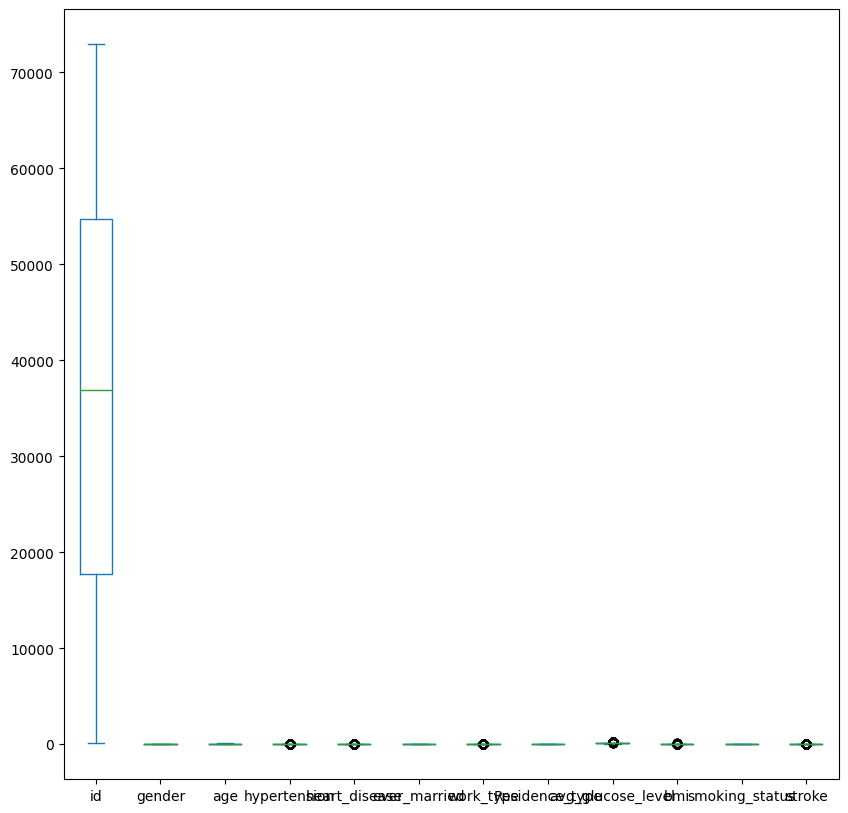

In [175]:
data.plot(kind='box')
plt.show()

In [105]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [106]:
data[data['avg_glucose_level']>114.090000]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5071,52652,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,39935,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,65411,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


# Label Encoding

In [107]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [108]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [109]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [110]:
gender=enc.fit_transform(data['gender'])

In [111]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [112]:
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [113]:
work_type=enc.fit_transform(data['work_type'])

In [114]:
work_type

array([2, 3, 2, ..., 3, 2, 0])

In [115]:
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [116]:
ever_married

array([1, 1, 1, ..., 1, 1, 1])

In [117]:
Residence_type

array([1, 0, 0, ..., 0, 0, 1])

In [118]:
data['work_type']=work_type

In [119]:
data['ever_married']=ever_married
data['gender']=gender
data['Residence_type']=Residence_type

In [120]:
data['smoking_status']=smoking_status

In [121]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


In [123]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# Spling the data for train and test

X --train_X,test_X 80/20
y --train_Y,test_Y

In [124]:
X=data.drop('stroke',axis=1)

In [125]:
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [126]:
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [127]:
Y =data['stroke']

In [128]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [131]:
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,65673,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,53525,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,52034,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,132,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,44033,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...,...
4171,12834,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,64174,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,33167,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,41424,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [132]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [133]:
X_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,67465,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,64159,0,44.0,0,0,1,2,0,110.41,30.5,3
744,16685,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,29934,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,24289,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...,...
4795,54437,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,44233,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,52457,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,42329,0,77.0,0,0,1,2,0,75.06,22.0,0


In [134]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

# Normalization

In [135]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [136]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [137]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [138]:
X_train_std

array([[ 1.37921235, -0.83822764,  0.52508975, ..., -0.86380214,
         0.32750249,  0.58675012],
       [ 0.80241813, -0.83822764,  1.27625065, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 0.73162457,  1.19059095, -0.53537271, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.16419174, -0.83822764,  0.70183349, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 0.2278555 ,  1.19059095,  0.70183349, ...,  1.93039389,
         0.19788379, -1.27409897],
       [ 0.89191905, -0.83822764,  0.30416007, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [139]:
X_test_std

array([[ 1.46429757, -0.83822764, -1.021418  , ...,  0.23941148,
        -1.52604504,  0.58675012],
       [ 1.30732674, -0.83822764,  0.03904446, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.94676684, -0.83822764,  1.23206472, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [ 0.75170886, -0.83822764,  0.65764755, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [ 0.27082544, -0.83822764,  1.49718033, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [-0.29400368,  1.19059095,  1.49718033, ..., -0.26117525,
         0.61266365, -1.27409897]])

# Training

#Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [141]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [142]:
dt.feature_importances_

array([0.20694707, 0.00842324, 0.16125735, 0.02034966, 0.01067105,
       0.00496812, 0.02548122, 0.03977264, 0.26454003, 0.19364508,
       0.06394454])

In [143]:
X_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [144]:
Y_pred=dt.predict(X_test_std)

In [145]:
X_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,67465,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,64159,0,44.0,0,0,1,2,0,110.41,30.5,3
744,16685,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,29934,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,24289,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...,...
4795,54437,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,44233,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,52457,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,42329,0,77.0,0,0,1,2,0,75.06,22.0,0


In [146]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [149]:
ac_dt

0.9295499021526419

# Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
lr=LogisticRegression()

In [152]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [153]:
Y_pred=lr.predict(X_test_std)

In [154]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [156]:
ac_lr

0.9471624266144814

# KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [158]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [159]:
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,65673,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,53525,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,52034,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,132,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,44033,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...,...
4171,12834,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,64174,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,33167,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,41424,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [160]:
X_train_std

array([[ 1.37921235, -0.83822764,  0.52508975, ..., -0.86380214,
         0.32750249,  0.58675012],
       [ 0.80241813, -0.83822764,  1.27625065, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 0.73162457,  1.19059095, -0.53537271, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.16419174, -0.83822764,  0.70183349, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 0.2278555 ,  1.19059095,  0.70183349, ...,  1.93039389,
         0.19788379, -1.27409897],
       [ 0.89191905, -0.83822764,  0.30416007, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [161]:
X_train_std

array([[ 1.37921235, -0.83822764,  0.52508975, ..., -0.86380214,
         0.32750249,  0.58675012],
       [ 0.80241813, -0.83822764,  1.27625065, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 0.73162457,  1.19059095, -0.53537271, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.16419174, -0.83822764,  0.70183349, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 0.2278555 ,  1.19059095,  0.70183349, ...,  1.93039389,
         0.19788379, -1.27409897],
       [ 0.89191905, -0.83822764,  0.30416007, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [162]:
Y_pred=knn.predict(X_test_std)

In [163]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [164]:
ac_knn

0.9412915851272016

In [165]:
ac_lr

0.9471624266144814

In [166]:
accuracy_score(Y_test,Y_pred)

0.9412915851272016

# Random Forest

# SVM

In [167]:
from sklearn.svm import SVC
sv=SVC()

In [168]:
sv.fit(X_train_std,Y_train)

SVC()

In [169]:
Y_pred=sv.predict(X_test_std)

In [170]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [171]:
ac_sv

0.9471624266144814

In [172]:
ac_lr

0.9471624266144814

<BarContainer object of 4 artists>

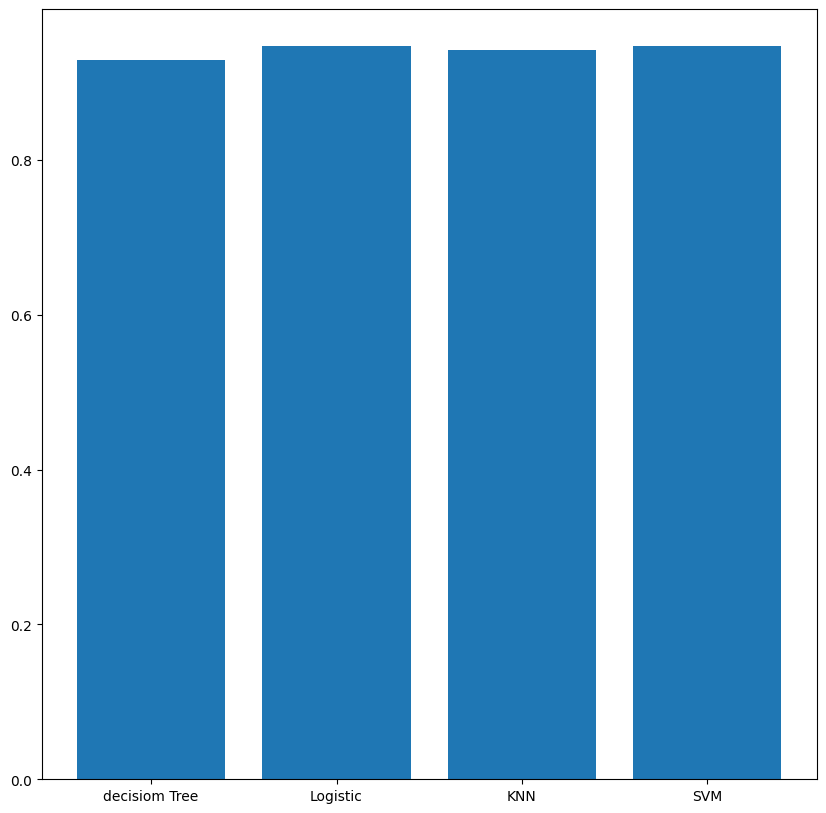

In [173]:
plt.bar(['decisiom Tree','Logistic','KNN','SVM'],[ac_dt,ac_lr,ac_knn,ac_sv])

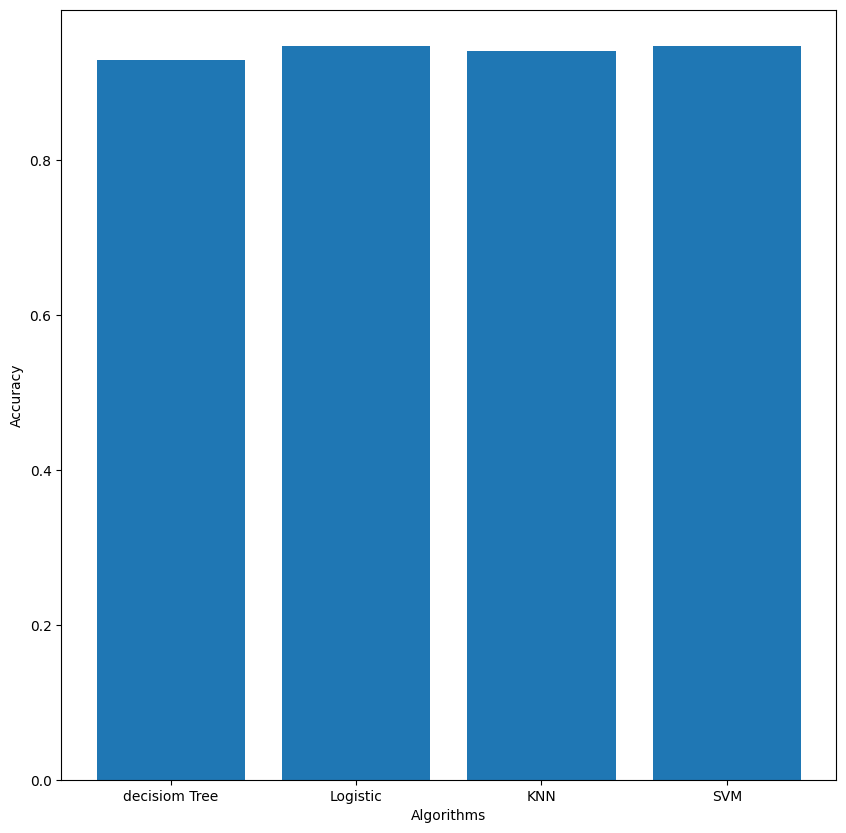

In [174]:
plt.bar(['decisiom Tree','Logistic','KNN','SVM'],[ac_dt,ac_lr,ac_knn,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()